# BY Said Mohamed
# For CODEALPHA Interns

#  TITANIC CLASSIFICATION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

## Loading Data 

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data preprocessing & Cleaning

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [7]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# check values null
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

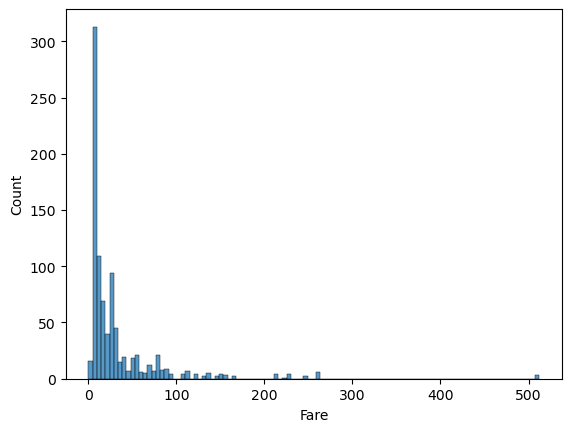

In [12]:
sns.histplot(data=df, x='Fare')

In [13]:
q1 = df['Fare'].quantile(.25)
q3 = df['Fare'].quantile(.75)
iqr = q3-q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
upper,lower

(65.6344, -26.724)

In [14]:
df.loc[(df['Fare'] > upper) , 'Fare'] = upper

<Axes: xlabel='Fare', ylabel='Count'>

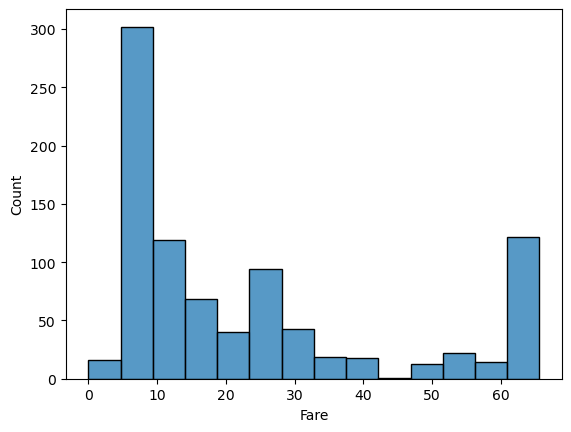

In [15]:
sns.histplot(data=df, x='Fare')

## Data Visualization & Exploratory

In [16]:
df.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
391,1,3,male,21.000000,0,0,7.7958,S
738,0,3,male,29.699118,0,0,7.8958,S


In [17]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

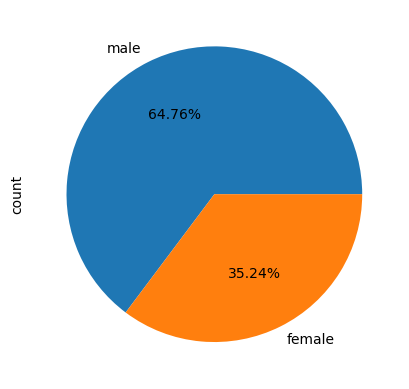

In [18]:
df['Sex'].value_counts().plot.pie(autopct='%.2f%%')

<Axes: xlabel='Survived', ylabel='count'>

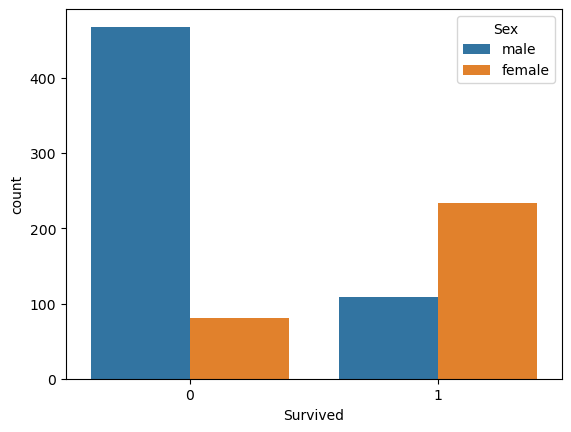

In [19]:
sns.countplot(data=df, x='Survived', hue='Sex')

<Axes: xlabel='Embarked', ylabel='count'>

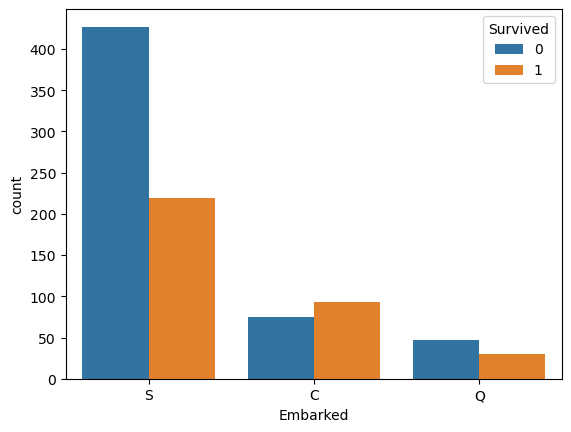

In [20]:
sns.countplot(data=df, x='Embarked', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

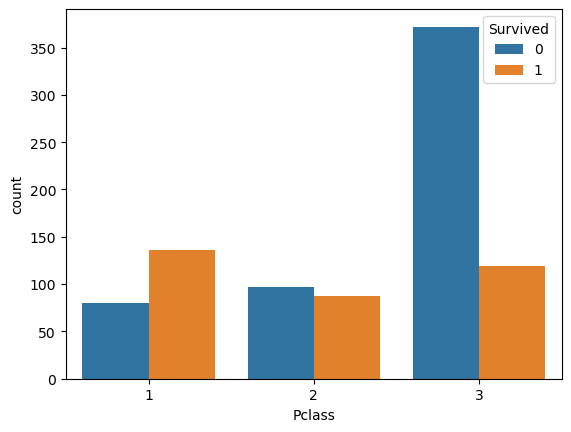

In [21]:
sns.countplot(data=df, x='Pclass', hue='Survived')

## Data Transfromation

In [22]:
le =LabelEncoder()

In [23]:
df['Sex'] = le.fit_transform(df['Sex'])

In [24]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,65.6344,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Spilt Data

In [26]:
X = df.drop('Survived',axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,65.6344,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [27]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Build Model

In [29]:
rf =RandomForestClassifier()

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = rf.predict(X_test)

## Evolution Model

Accuracy:0.84


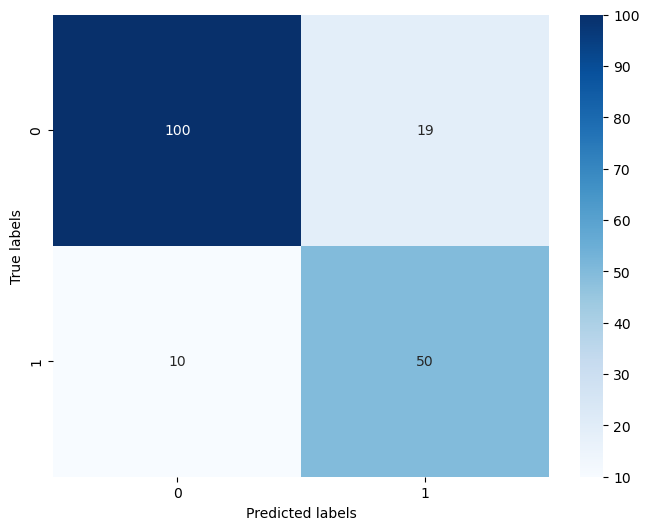

In [32]:
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy:{accuracy:.2f}")
CM = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [33]:
Xgc = XGBClassifier()

In [34]:
Xgc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = Xgc.predict(X_test)

Accuracy:0.85


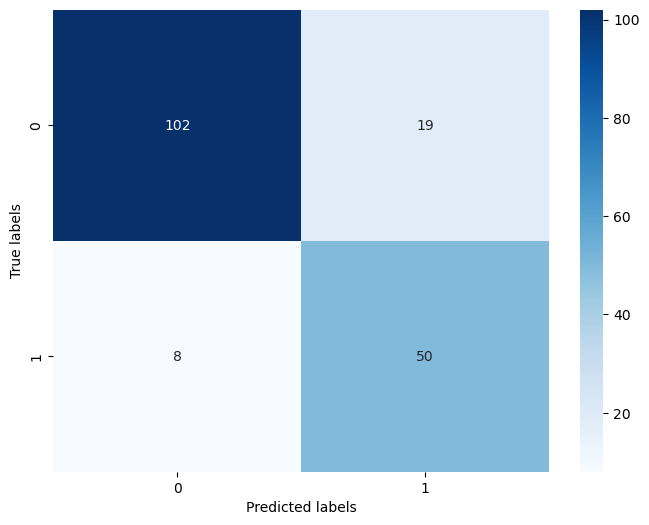

In [36]:
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy:{accuracy:.2f}")
CM = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Thanks!